In [18]:
import numpy as np
import pandas as pd
import seaborn as sns

# Week 10 Activity contributers: Muneeb P, Nithin V, Anaswara Mohan

# 1. Load the data into the pandas environment and identify some basic details of the dataset

In [2]:
data= pd.read_csv("G:\study\Data Science - ICT\week10\employee.csv")

In [47]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723.0
1,S Kumar,NaN,16000.0,F,Finance,G0,520.0
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674.0
3,Ying Chin,45.0,65000.0,F,Sales,G3,556.0
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711.0
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649.0
6,James Authur,54.0,NaN,F,Operations,G3,649.0
7,Josh Wills,54.0,52000.0,F,Finance,G3,901.0
8,Leo Duck,23.0,98000.0,M,Sales,G4,709.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [5]:
data.isnull().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

# 3. Select rows for specific names Jack Morgan and Josh wills.

In [6]:
data1 =pd.read_csv('G:\study\Data Science - ICT\week10\employee.csv',index_col='name')
data1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [7]:
data1.loc[['Jack Morgan', 'Josh Wills'], :]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.

In [8]:
data1[(data1['department'] == 'Sales') | (data1['department'] == 'Finance')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score.

In [9]:
data1[data1['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score

In [10]:
data1[(data1['performance_score']>500) | (data1['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 7. Check and handle missing values in the dataset.

In [11]:
data1.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [46]:
data1['age'].fillna(value = data1['age'].mean , inplace = True)

In [13]:
data1['income'].fillna(value = data1['income'].median , inplace = True)

In [14]:
data1['gender'].fillna(value = data1['gender'].mode , inplace = True)

In [15]:
data1.isnull().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8. Check the outliers and handle outliers in performance score using Percentiles.

<AxesSubplot:xlabel='age'>

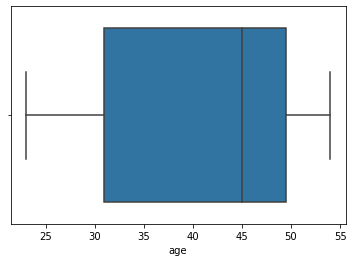

In [22]:
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(data['age'])

<AxesSubplot:xlabel='income'>

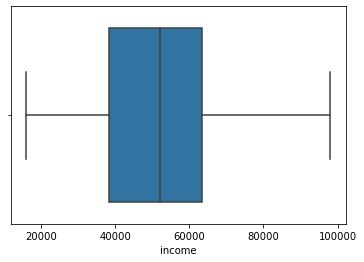

In [23]:
sns.boxplot(data['income'])

<AxesSubplot:xlabel='performance_score'>

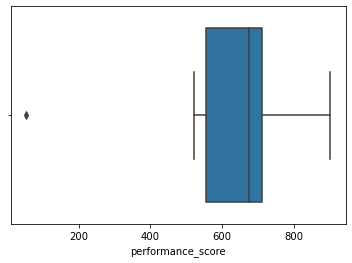

In [24]:
sns.boxplot(data['performance_score'])

In [ ]:
#There is an outlier in performance_score. Hence we will handle it using IQR

In [25]:
Q1 = np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2 = np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3 = np.percentile(data['performance_score'],75,interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR     
up_limit = Q3 + 1.5*IQR
outlier = []
for x in data['performance_score']:
    if (x > up_limit) or (x < low_limit):
        outlier.append(x)
outlier

[53]

In [38]:
data.loc[data['performance_score'] == 53]

,name,age,income,gender,department,grade,performance_score
6,James Authur,54.0,NaN,F,Operations,G3,53


In [48]:
#Since the performance score is very low we will replace it with the median performance score for the grade G3
G3 = data[data['grade']=='G3']['performance_score'].median()
G3

649.0

In [44]:
data['performance_score'].replace({53 : G3},inplace=True)
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723.0
1,S Kumar,NaN,16000.0,F,Finance,G0,520.0
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674.0
3,Ying Chin,45.0,65000.0,F,Sales,G3,556.0
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711.0
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649.0
6,James Authur,54.0,NaN,F,Operations,G3,649.0
7,Josh Wills,54.0,52000.0,F,Finance,G3,901.0
8,Leo Duck,23.0,98000.0,M,Sales,G4,709.0


# 9. Check the gender column and do Dummy encoding.

In [49]:
data2 = pd.get_dummies(data,columns=['gender'])
data2

,name,age,income,department,grade,performance_score,gender_F,gender_M
0,Allen Smith,45.0,NaN,Operations,G3,723.0,0,0
1,S Kumar,NaN,16000.0,Finance,G0,520.0,1,0
2,Jack Morgan,32.0,35000.0,Finance,G2,674.0,0,1
3,Ying Chin,45.0,65000.0,Sales,G3,556.0,1,0
4,Dheeraj Patel,30.0,42000.0,Operations,G2,711.0,1,0
5,Satyam Sharma,NaN,62000.0,Sales,G3,649.0,0,0
6,James Authur,54.0,NaN,Operations,G3,649.0,1,0
7,Josh Wills,54.0,52000.0,Finance,G3,901.0,1,0
8,Leo Duck,23.0,98000.0,Sales,G4,709.0,0,1


# 10.Do the standard scaling on the feature performance score

In [50]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_data = scale.fit_transform(data[['performance_score']])
data['performance_score']=scaled_data

In [51]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,0.448014
1,S Kumar,NaN,16000.0,F,Finance,G0,-1.524328
2,Jack Morgan,32.0,35000.0,M,Finance,G2,-0.028068
3,Ying Chin,45.0,65000.0,F,Sales,G3,-1.174553
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,0.331423
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,-0.270968
6,James Authur,54.0,NaN,F,Operations,G3,-0.270968
7,Josh Wills,54.0,52000.0,F,Finance,G3,2.177457
8,Leo Duck,23.0,98000.0,M,Sales,G4,0.311991
